<a href="https://colab.research.google.com/github/Deadline430/SL_REPORT_2025/blob/main/Hotel_Booking_DT_kNN_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare the packages for this project



In [ ]:
# --- Installation Commands ---
# Run these commands if you don't have the necessary packages installed in your environment.
!pip install --upgrade pandas scikit-learn matplotlib numpy plotly psutil scipy

# --- Import Required Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn # Import sklearn directly to get version
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, learning_curve, validation_curve, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, precision_recall_curve, auc
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import pointbiserialr
import time
import platform
import psutil
import resource

print("\n--- Environment Information ---")
print(f"Python Version: {platform.python_version()}")
print(f"System: {platform.system()} {platform.release()}")
print(f"Processor: {platform.processor()}")
print(f"Total RAM: {round(psutil.virtual_memory().total / (1024**3), 2)} GB")


--- Environment Information ---
Python Version: 3.12.11
System: Linux 6.1.123+
Processor: x86_64
Total RAM: 50.99 GB


In [ ]:
hi


## View and Preprocessing the Dataset


### Dataset Overview

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/CS Master 2025/CS7641 Machine Learning/SL Report/Hotel Data/hotel_bookings.csv')
# Display the first 5 rows of the DataFrame
pd.set_option('display.max_columns', None)
display(df.head())
# Get information about the DataFrame, including data types and non-null values
display(df.info())
# Get descriptive statistics for numerical columns
display(df.describe())
# Get descriptive statistics for categorical columns
display(df.describe(include='object'))

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

None

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [ ]:
# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Iterate through categorical columns and print value counts
for col in categorical_cols:
    print(f"Value counts for '{col}':")
    display(df[col].value_counts())
    print("-" * 30) # Print a separator for better readability

Value counts for 'hotel':


,count
hotel,
City Hotel,79330
Resort Hotel,40060


------------------------------
Value counts for 'arrival_date_month':


,count
arrival_date_month,
August,13877
July,12661
May,11791
October,11160
April,11089
June,10939
September,10508
March,9794
February,8068


------------------------------
Value counts for 'meal':


,count
meal,
BB,92310
HB,14463
SC,10650
Undefined,1169
FB,798


------------------------------
Value counts for 'country':


,count
country,
PRT,48590
GBR,12129
FRA,10415
ESP,8568
DEU,7287
...,...
MRT,1
KIR,1
SDN,1


------------------------------
Value counts for 'market_segment':


,count
market_segment,
Online TA,56477
Offline TA/TO,24219
Groups,19811
Direct,12606
Corporate,5295
Complementary,743
Aviation,237
Undefined,2


------------------------------
Value counts for 'distribution_channel':


,count
distribution_channel,
TA/TO,97870
Direct,14645
Corporate,6677
GDS,193
Undefined,5


------------------------------
Value counts for 'reserved_room_type':


,count
reserved_room_type,
A,85994
D,19201
E,6535
F,2897
G,2094
B,1118
C,932
H,601
P,12


------------------------------
Value counts for 'assigned_room_type':


,count
assigned_room_type,
A,74053
D,25322
E,7806
F,3751
G,2553
C,2375
B,2163
H,712
I,363


------------------------------
Value counts for 'deposit_type':


,count
deposit_type,
No Deposit,104641
Non Refund,14587
Refundable,162


------------------------------
Value counts for 'customer_type':


,count
customer_type,
Transient,89613
Transient-Party,25124
Contract,4076
Group,577


------------------------------
Value counts for 'reservation_status':


,count
reservation_status,
Check-Out,75166
Canceled,43017
No-Show,1207


------------------------------
Value counts for 'reservation_status_date':


,count
reservation_status_date,
2015-10-21,1461
2015-07-06,805
2016-11-25,790
2015-01-01,763
2016-01-18,625
...,...
2015-02-26,1
2015-03-18,1
2015-03-12,1


------------------------------


### Handle the missing values

In [ ]:
# Impute missing values in 'company' and 'agent' columns with 0
df['company'] = df['company'].fillna(0)
df['agent'] = df['agent'].fillna(0)

# Find the most frequent country
most_frequent_country = df['country'].mode()[0]

# Impute missing values in 'country' column with the most frequent country
df['country'] = df['country'].fillna(most_frequent_country)

# Impute missing values in 'children' column with 0
df['children'] = df['children'].fillna(0)

print("Missing values after imputation:")
display(df[['company', 'agent', 'country', 'children']].isnull().sum())

Missing values after imputation:


,0
company,0
agent,0
country,0
children,0


### Handling Invalid Data and Outliers




In [ ]:
# IF the sum of adults, children and babies is zero, this record provide no useful info and need to be removed
df = df[(df['adults'] + df['children'] + df['babies']) > 0]

# Check the records after removing non-sense data
print(f"After removing no useful info: {df.shape}")

After removing no useful info: (119210, 32)


In [ ]:
# Remove outlier rows where adr is greater than 5000
df = df[df['adr'] <= 5000].copy()

# Remove rows where adr is 0 unless market_segment is Complementary
df = df[~((df['adr'] == 0) & (df['market_segment'] != 'Complementary'))].copy()

# Display the shape of the updated DataFrame
print(f"DataFrame shape after removing ADR > 5000 and specific ADR=0 cases: {df.shape}")

DataFrame shape after removing ADR > 5000 and specific ADR=0 cases: (118064, 32)


In [ ]:
# Remove the records to reduce features after one-hot encoding

df = df[df['market_segment'] != 'Undefined'].copy()
df = df[df['distribution_channel'] != 'Undefined'].copy()

# Display the shape of the updated DataFrame to verify the rows have been removed
display(df.shape)

(118059, 32)

### Data Leakage Prevention

In [ ]:
# Remove 'reservation_status' and 'reservation_status_date' columns
df = df.drop(['reservation_status', 'reservation_status_date'], axis=1)

# Display the shape of the updated DataFrame to verify the columns have been removed
display(df.shape)

(118059, 30)

### Handling High-Cardinality Categorical Features

In [ ]:
# There are 100+ unique country codes, one-hot encoding would create an unmanagablly large data set with numereous features, leading to the curse of dimensionality.
global_cancellation_mean = df['is_canceled'].mean()

# Calculate the mean of the target variable for each country
country_cancellation_mean = df.groupby('country')['is_canceled'].mean()

# Define the smoothing parameter (alpha). A higher alpha means more smoothing towards the global mean.
alpha = 5 # This value can be tuned

# Calculate the smoothed mean for each country
# Formula: (count * category_mean + alpha * global_mean) / (count + alpha)
country_counts = df['country'].value_counts()
smoothed_country_cancellation = (country_cancellation_mean * country_counts + alpha * global_cancellation_mean) / (country_counts + alpha)

# Map the smoothed values back to the DataFrame
df['country_encoded'] = df['country'].map(smoothed_country_cancellation)

# Display the first few rows with the new encoded column
display(df[['country', 'country_encoded', 'is_canceled']].head(10))

,country,country_encoded,is_canceled
2,GBR,0.203119,0
3,GBR,0.203119,0
4,GBR,0.203119,0
5,GBR,0.203119,0
6,PRT,0.571031,0
7,PRT,0.571031,0
8,PRT,0.571031,1
9,PRT,0.571031,1
10,PRT,0.571031,1
11,PRT,0.571031,0


In [ ]:
country_counts

,count
country,
PRT,48099
GBR,12071
FRA,10361
ESP,8498
DEU,7249
...,...
MRT,1
KIR,1
SDN,1


In [ ]:
# Select the remaining categorical columns (excluding 'country' and the target variable if it's still an object type)
categorical_cols_for_onehot = df.select_dtypes(include='object').columns.tolist()

# Remove 'country' from the list as it has already been encoded
categorical_cols_for_onehot.remove('country')

# Apply one-hot encoding to the selected categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols_for_onehot, drop_first=True) # drop_first=True avoids multicollinearity

# Display the first few rows and the shape of the new DataFrame to show the encoded features
display(df_encoded.head())
display(df_encoded.shape)
display(df_encoded.info())


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,country_encoded,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
2,0,7,2015,27,1,0,1,1,0.0,0,GBR,0,0,0,0,0.0,0.0,0,75.0,0,0,0.203119,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
3,0,13,2015,27,1,0,1,1,0.0,0,GBR,0,0,0,0,304.0,0.0,0,75.0,0,0,0.203119,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,0,14,2015,27,1,0,2,2,0.0,0,GBR,0,0,0,0,240.0,0.0,0,98.0,0,1,0.203119,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
5,0,14,2015,27,1,0,2,2,0.0,0,GBR,0,0,0,0,240.0,0.0,0,98.0,0,1,0.203119,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
6,0,0,2015,27,1,0,2,2,0.0,0,PRT,0,0,0,0,0.0,0.0,0,107.0,0,0,0.571031,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False


(118059, 70)

<class 'pandas.core.frame.DataFrame'>
Index: 118059 entries, 2 to 119389
Data columns (total 70 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118059 non-null  int64  
 1   lead_time                       118059 non-null  int64  
 2   arrival_date_year               118059 non-null  int64  
 3   arrival_date_week_number        118059 non-null  int64  
 4   arrival_date_day_of_month       118059 non-null  int64  
 5   stays_in_weekend_nights         118059 non-null  int64  
 6   stays_in_week_nights            118059 non-null  int64  
 7   adults                          118059 non-null  int64  
 8   children                        118059 non-null  float64
 9   babies                          118059 non-null  int64  
 10  country                         118059 non-null  object 
 11  is_repeated_guest               118059 non-null  int64  
 12  previous_cancellation

None

## Exploratory Data Analysis

### Distribution of Booking Cancellation

In [ ]:
# Calculate the distribution of the target variable 'is_canceled'
cancellation_distribution = df['is_canceled'].value_counts()

# Calculate the percentage distribution
cancellation_percentage = df['is_canceled'].value_counts(normalize=True) * 100

print("Distribution of Booking Cancellation:")
display(cancellation_distribution)
print("\nPercentage Distribution of Booking Cancellation:")
display(cancellation_percentage)


Distribution of Booking Cancellation:


,count
is_canceled,
0,73969
1,44090



Percentage Distribution of Booking Cancellation:


,proportion
is_canceled,
0,62.654266
1,37.345734


### Analyze numerical features impact on cancellation

In [ ]:
from scipy.stats import pointbiserialr

# Identify numerical columns (excluding the target and the already encoded country)
numerical_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('is_canceled')
numerical_cols.remove('country_encoded') # Exclude the encoded country column

# Calculate point-biserial correlation for each numerical column
correlations = {}
for col in numerical_cols:
    correlation, _ = pointbiserialr(df_encoded[col], df_encoded['is_canceled'])
    correlations[col] = correlation

# Print the correlation coefficients, sorted by absolute value
print("Point-Biserial Correlation with 'is_canceled':")
for col, corr in sorted(correlations.items(), key=lambda item: abs(item[1]), reverse=True):
    print(f"{col}: {corr:.4f}")

Point-Biserial Correlation with 'is_canceled':
lead_time: 0.2919
total_of_special_requests: -0.2374
required_car_parking_spaces: -0.1973
booking_changes: -0.1445
previous_cancellations: 0.1097
company: -0.0838
is_repeated_guest: -0.0783
adults: 0.0581
previous_bookings_not_canceled: -0.0576
days_in_waiting_list: 0.0544
agent: -0.0464
adr: 0.0367
babies: -0.0330
stays_in_week_nights: 0.0207
arrival_date_year: 0.0148
arrival_date_week_number: 0.0092
arrival_date_day_of_month: -0.0060
stays_in_weekend_nights: -0.0051
children: 0.0046


#### Based on above EDA on numerical data, "lead_time", "total_of_special_requests", "required_car_parking_spaces", and “booking_changes” appear to have relatively stronger linear relationships (~0.2) with is_canceled.

## Analyze categorical features


In [ ]:
# Select categorical columns (excluding 'country' as it has been encoded)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'country' in categorical_cols:
    categorical_cols.remove('country')

# Iterate through categorical columns and calculate cancellation rates
print("Cancellation Rate by Category:")
for col in categorical_cols:
    print(f"\nFeature: '{col}'")
    # Calculate cancellation rate (mean of 'is_canceled') for each category
    cancellation_rate_by_category = df.groupby(col)['is_canceled'].mean().reset_index()
    cancellation_rate_by_category = cancellation_rate_by_category.rename(columns={'is_canceled': 'cancellation_rate'})
    display(cancellation_rate_by_category)
    print("-" * 30) # Print a separator

Cancellation Rate by Category:

Feature: 'hotel'


,hotel,cancellation_rate
0,City Hotel,0.420221
1,Resort Hotel,0.280377


------------------------------

Feature: 'arrival_date_month'


,arrival_date_month,cancellation_rate
0,April,0.410107
1,August,0.379869
2,December,0.355884
3,February,0.336892
4,January,0.307705
5,July,0.377485
6,June,0.416536
7,March,0.324185
8,May,0.400171
9,November,0.316458


------------------------------

Feature: 'meal'


,meal,cancellation_rate
0,BB,0.376525
1,FB,0.601513
2,HB,0.347823
3,SC,0.377637
4,Undefined,0.251539


------------------------------

Feature: 'market_segment'


,market_segment,cancellation_rate
0,Aviation,0.220779
1,Complementary,0.122253
2,Corporate,0.189407
3,Direct,0.153896
4,Groups,0.617292
5,Offline TA/TO,0.346257
6,Online TA,0.369384


------------------------------

Feature: 'distribution_channel'


,distribution_channel,cancellation_rate
0,Corporate,0.222561
1,Direct,0.175709
2,GDS,0.195767
3,TA/TO,0.413302


------------------------------

Feature: 'reserved_room_type'


,reserved_room_type,cancellation_rate
0,A,0.394680
1,B,0.328792
2,C,0.333333
3,D,0.319578
4,E,0.294846
5,F,0.305817
6,G,0.368880
7,H,0.410385
8,L,0.333333


------------------------------

Feature: 'assigned_room_type'


,assigned_room_type,cancellation_rate
0,A,0.447230
1,B,0.238073
2,C,0.189846
3,D,0.252715
4,E,0.252710
5,F,0.248521
6,G,0.308608
7,H,0.355524
8,I,0.024390
9,K,0.081967


------------------------------

Feature: 'deposit_type'


,deposit_type,cancellation_rate
0,No Deposit,0.286136
1,Non Refund,0.993624
2,Refundable,0.222222


------------------------------

Feature: 'customer_type'


,customer_type,cancellation_rate
0,Contract,0.311204
1,Group,0.076642
2,Transient,0.410449
3,Transient-Party,0.257250


------------------------------


#### For categorical features, "deposit_type", "market_segment", and "customer_type" show significant differences and notable variance in cancellation rates across their categories, indicating they are likely important.For instance, the deposit_type feature shows a very large difference in cancellation rates between 'No Deposit' (around 28.6%) and 'Non Refund' (around 99.4%), suggesting it's a very strong predictor.

## Hypothesis on the Primary Drivers of Cancellation

### Hypothesis Statements:
Based on the comprehensive exploratory data analysis, the central hypothesis is that the likelihood of a hotel booking cancellation is primarily driven by factors indicating low guest commitment. Hence, it's a classication task.

## Modeling and Comparative Analysis

### Data Splitting


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# Assuming the target variable 'is_canceled' , "country" is in df_encoded
X = df_encoded.drop(['is_canceled',"country"], axis=1)
y = df_encoded['is_canceled']

# Set a random state for reproducibility
random_state = 42

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 20% for testing
    stratify=y,     # Stratify based on the target variable
    random_state=random_state # Set the random state
)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# You can also check the distribution of the target variable in the splits
print("\nDistribution of 'is_canceled' in y_train:")
display(y_train.value_counts(normalize=True))
print("\nDistribution of 'is_canceled' in y_test:")
display(y_test.value_counts(normalize=True))

Shape of X_train: (94447, 68)
Shape of X_test: (23612, 68)
Shape of y_train: (94447,)
Shape of y_test: (23612,)

Distribution of 'is_canceled' in y_train:


,proportion
is_canceled,
0,0.626542
1,0.373458



Distribution of 'is_canceled' in y_test:


,proportion
is_canceled,
0,0.626546
1,0.373454


### Preprocessing the numeric features


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Identify numerical features
# Assuming df_encoded is the DataFrame after all preprocessing and encoding
# Exclude the target variable 'is_canceled'
numerical_features = df_encoded.select_dtypes(include=np.number).columns.tolist()
if 'is_canceled' in numerical_features:
    numerical_features.remove('is_canceled')

# Create a ColumnTransformer to apply StandardScaler to numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)],
    remainder='passthrough' # Keep other columns (e.g., one-hot encoded categorical)
)

## Decision Tree
## Define the decision tree model and hyperparameter grid


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Assuming preprocessor is already defined as in a previous step

# Update the pipeline to include the DecisionTreeClassifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(random_state=random_state, criterion="gini"))]) # Add Decision Tree classifier, using gini as criterion

# Define the hyperparameter grid for the DecisionTreeClassifier
param_grid = {
    'classifier__max_depth': [6, 10, 14, 18], # Explore different max depths
    'classifier__min_samples_leaf': [50, 100, 200], # Explore different min samples per leaf
    'classifier__min_samples_split': [100, 200, 400], # Explore different min samples per split
    'classifier__max_features': ['sqrt', 'log2', 0.5], # Explore different max features
    'classifier__ccp_alpha': [0.0, 1e-4, 5e-4, 1e-3], # Explore different complexity parameter for pruning
    'classifier__class_weight': ['balanced'] # Explore different class weights
}

print("DecisionTreeClassifier added to the pipeline and hyperparameter grid defined.")

DecisionTreeClassifier added to the pipeline and hyperparameter grid defined.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedShuffleSplit
import time
import platform
import psutil
import resource # Import resource for peak memory

# Start timer for tuning process
start_time = time.time()

# Define StratifiedShuffleSplit for cross-validation
cv_strategy = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=random_state)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipeline,
    param_grid,
    n_iter=50,  # You can increase or decrease this number based on your computational budget
    cv=cv_strategy,       # Use StratifiedShuffleSplit for cross-validation
    scoring={'roc_auc': 'roc_auc', 'f1': 'f1'}, # Use both ROC AUC and F1 as scoring metrics
    refit='roc_auc', # Refit the best model based on ROC AUC
    random_state=random_state,
    n_jobs=-1   # Use all available CPU cores
)

# Perform the random search on the training data (includes final fit of best estimator)
random_search.fit(X_train, y_train)

# End timer for tuning process
end_time = time.time()
tuning_runtime = end_time - start_time

# Get peak memory usage after the random search fit process finishes
peak_memory_kb = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
peak_memory_gb = peak_memory_kb / (1024**2) # Convert from KB to GB

# Print the best hyperparameters found
print("Best hyperparameters found:")
display(random_search.best_params_)

# Print the best cross-validation scores for both metrics
print(f"\nBest cross-validation ROC AUC score: {random_search.best_score_:.4f}")
# Access the mean test F1 score from the cv_results_
mean_test_f1 = random_search.cv_results_['mean_test_f1'][random_search.best_index_]
print(f"Best cross-validation F1 score: {mean_test_f1:.4f}")

# Report the tuning runtime, and hardware
print(f"\nHyperparameter Tuning Runtime (including final fit): {tuning_runtime:.2f} seconds")

print("\n--- Hardware Information ---")
print(f"Processor: {platform.processor()}")
print(f"Python Version: {platform.python_version()}")
print(f"System: {platform.system()} {platform.release()}")
print(f"Total RAM: {round(psutil.virtual_memory().total / (1024**3), 2)} GB")
print(f"Estimated Peak RAM Usage (during Tuning/Final Fit): {peak_memory_gb:.4f} GB")


Best hyperparameters found:


{'classifier__min_samples_split': 100,
 'classifier__min_samples_leaf': 50,
 'classifier__max_features': 0.5,
 'classifier__max_depth': 14,
 'classifier__class_weight': 'balanced',
 'classifier__ccp_alpha': 0.0}


Best cross-validation ROC AUC score: 0.9277
Best cross-validation F1 score: 0.7966

Hyperparameter Tuning Runtime (including final fit): 18.78 seconds

--- Hardware Information ---
Processor: x86_64
Python Version: 3.12.11
System: Linux 6.1.123+
Total RAM: 50.99 GB
Estimated Peak RAM Usage (during Tuning/Final Fit): 0.4572 GB


### Evaluation the Performance




F1 Score on Test Set: 0.8040
ROC AUC Score on Test Set: 0.8466

Prediction Runtime (on test set): 0.0171 seconds

Confusion Matrix on Test Set:


array([[12370,  2424],
       [ 1261,  7557]])

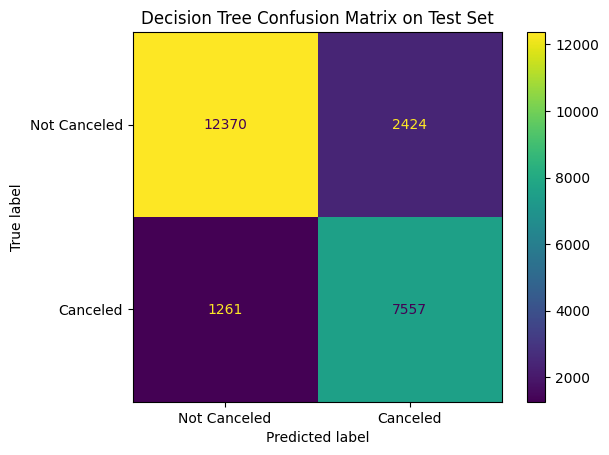

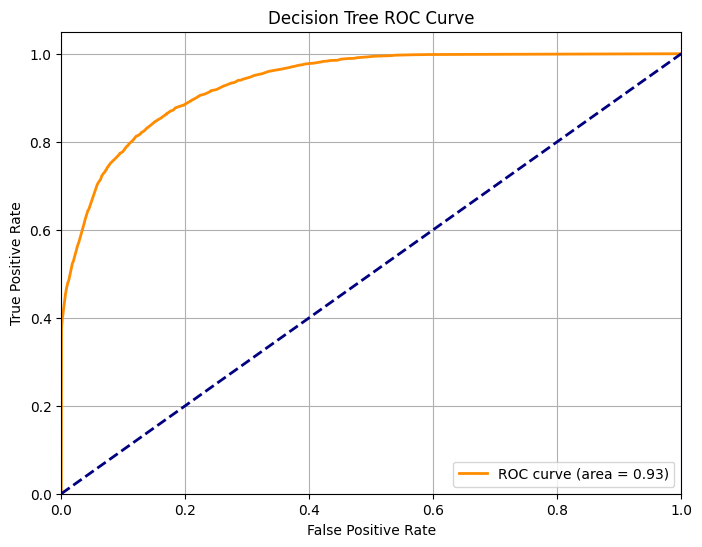

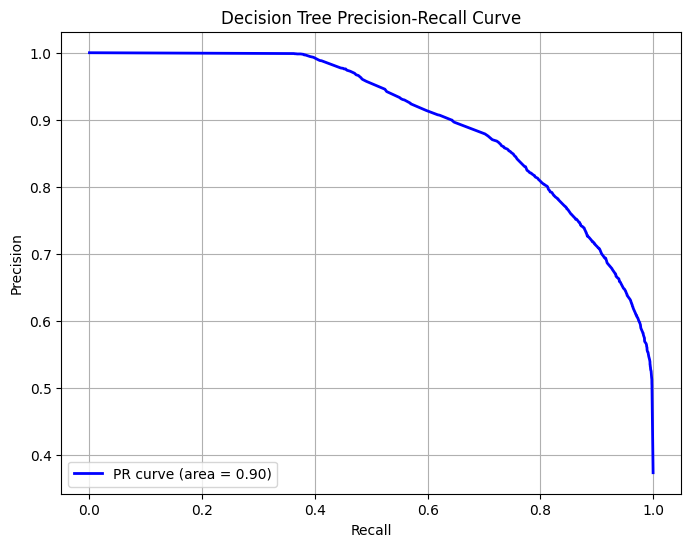

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt # Ensure matplotlib is imported
import time # Import time to measure prediction runtime

# Get the best model from the random search
best_model = random_search.best_estimator_

# Measure prediction time on the test set
start_predict_time = time.time()
y_pred = best_model.predict(X_test)
end_predict_time = time.time()

predict_runtime = end_predict_time - start_predict_time

# Get predicted probabilities for ROC and PR curves
y_prob = best_model.predict_proba(X_test)[:, 1] # Probability of the positive class (cancellation)


# Calculate performance metrics
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"F1 Score on Test Set: {f1:.4f}")
print(f"ROC AUC Score on Test Set: {roc_auc:.4f}")
# Print the prediction runtime
print(f"\nPrediction Runtime (on test set): {predict_runtime:.4f} seconds")

# Calculate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix on Test Set:")
display(cm)

# Optionally, visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Canceled', 'Canceled'])
disp.plot()
plt.title('Decision Tree Confusion Matrix on Test Set')
plt.show()

# Generate and plot ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_prob)
roc_auc_plot = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_plot:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Generate and plot Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Decision Tree Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

In [ ]:
# Get the trained Decision Tree model from the best pipeline
decision_tree_model = best_model.named_steps['classifier']

# Report tree characteristics
print("--- Decision Tree Characteristics ---")
print(f"Final Tree Depth: {decision_tree_model.get_depth()}")
print(f"Number of Leaves: {decision_tree_model.get_n_leaves()}")
print(f"Number of Nodes: {decision_tree_model.tree_.node_count}")

# Report top-10 Gini importances
print("\n--- Top-10 Gini Importances ---")
# Get feature importances
importances = decision_tree_model.feature_importances_

# Get feature names after preprocessing (including one-hot encoding and passthrough)
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

# Create a pandas Series for easier handling and sorting
feature_importances = pd.Series(importances, index=feature_names)

# Sort importances and print top 10
top_10_importances = feature_importances.sort_values(ascending=False).head(10)
display(top_10_importances)

--- Decision Tree Characteristics ---
Final Tree Depth: 14
Number of Leaves: 543
Number of Nodes: 1085

--- Top-10 Gini Importances ---


,0
num__country_encoded,0.275126
num__lead_time,0.169887
remainder__market_segment_Online TA,0.102337
remainder__deposit_type_Non Refund,0.091657
num__agent,0.085870
num__total_of_special_requests,0.067701
num__required_car_parking_spaces,0.049843
num__arrival_date_year,0.034644
num__previous_cancellations,0.023692
remainder__customer_type_Transient,0.014662


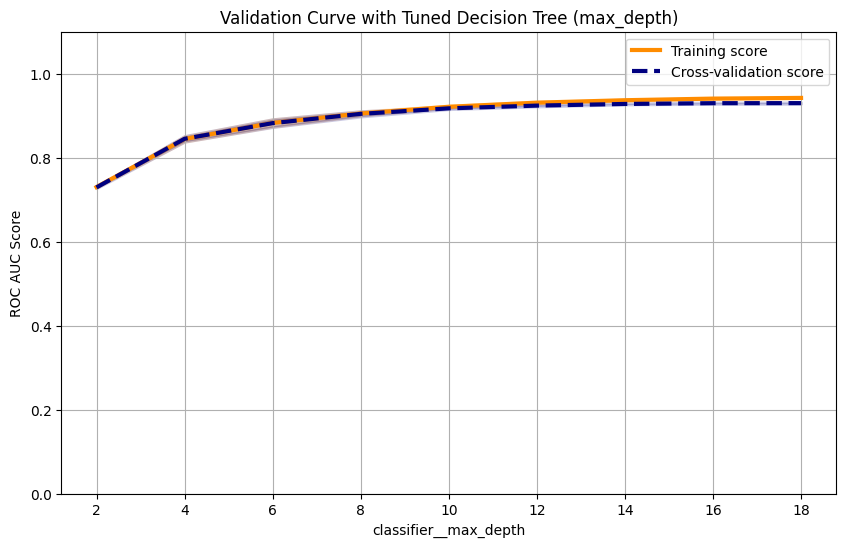

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
import numpy as np

# Get the best Decision Tree classifier parameters found during tuning
best_dt_params = random_search.best_params_.copy()
# Remove max_depth from the parameters to be passed to the tuned pipeline
if 'classifier__max_depth' in best_dt_params:
    del best_dt_params['classifier__max_depth']

# Create a pipeline with the best parameters found during tuning
pipeline_tuned_for_vc = Pipeline(steps=[
    ('preprocessor', best_model.named_steps['preprocessor']),
    ('classifier', DecisionTreeClassifier(random_state=random_state,
                                         criterion=best_model.named_steps['classifier'].criterion,
                                         **{k.replace('classifier__', ''): v for k, v in best_dt_params.items()})) # Use best params, removing 'classifier__' prefix
])

# Define the range of max_depth values to explore for the validation curve
param_range_max_depth = [2, 4, 6, 8, 10, 12, 14, 16, 18]

# Generate the validation curve for 'classifier__max_depth'
param_name = "classifier__max_depth"

train_scores, valid_scores = validation_curve(
    pipeline_tuned_for_vc, # Use the pipeline with best parameters (except max_depth)
    X_train, y_train, # Use unprocessed X_train with the full pipeline
    param_name=param_name,
    param_range=param_range_max_depth,
    cv=cv_strategy, # Use the same cross-validation strategy as tuning
    scoring="roc_auc", # Use ROC AUC as the scoring metric
    n_jobs=-1 # Use all available CPU cores
)

# Calculate mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve with Tuned Decision Tree (max_depth)")
plt.xlabel(param_name)
plt.ylabel("ROC AUC Score")
plt.ylim(0.0, 1.1)
lw = 2

plt.plot(param_range_max_depth, train_scores_mean, label="Training score",
             color="darkorange", lw=lw + 1, linestyle='-') # Solid line for training
plt.fill_between(param_range_max_depth, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range_max_depth, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw + 1, linestyle='--') # Dashed line for validation
plt.fill_between(param_range_max_depth, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.grid(True)
plt.show()

/tmp/ipython-input-1086138857.py:34: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
/tmp/ipython-input-1086138857.py:39: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",


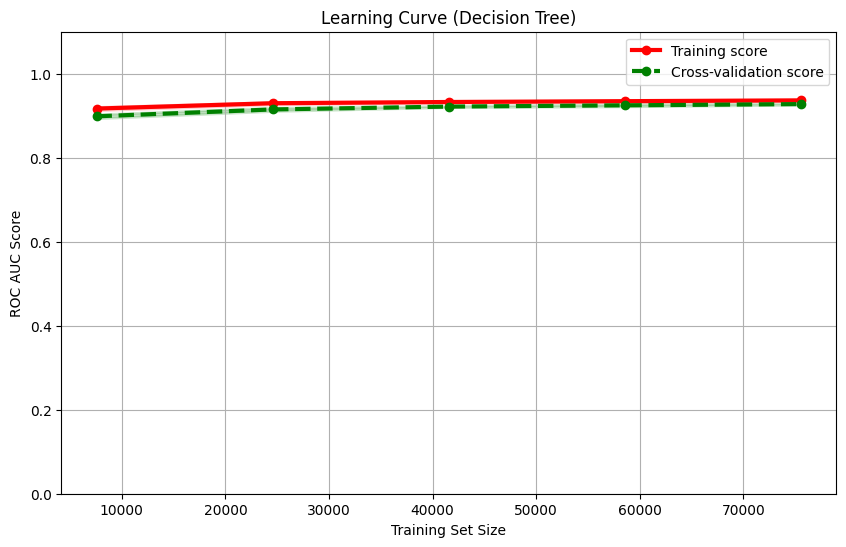

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Get the best model from the random search (which is the tuned pipeline)
best_pipeline = random_search.best_estimator_

# Generate learning curves
train_sizes, train_scores, valid_scores = learning_curve(
    best_pipeline,
    X_train, y_train,
    cv=cv_strategy,
    scoring="roc_auc", # Use ROC AUC as the scoring metric
    n_jobs=-1, # Use all available CPU cores
    train_sizes=np.linspace(0.1, 1.0, 5) # Use 5 different training set sizes from 10% to 100%
)

# Calculate mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve (Decision Tree)")
plt.xlabel("Training Set Size")
plt.ylabel("ROC AUC Score")
plt.ylim(0.0, 1.1)
lw = 2

plt.grid()
# Use different line styles and thicker lines for better differentiation
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score", lw=lw + 1, linestyle='-') # Solid line for training
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="r", lw=lw)
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",
         label="Cross-validation score", lw=lw + 1, linestyle='--') # Dashed line for validation
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="g", lw=lw)
plt.legend(loc="best")
plt.show()

##

## k-NN
## Define the K-NN model and hyperparameter grid

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Create a Pipeline for the KNN model
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier(algorithm='brute', n_jobs=-1))]) # Use KNeighborsClassifier with brute force algorithm and all cores

# Define the hyperparameter grid for the KNeighborsClassifier
knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 11, 21], # Explore different values for n_neighbors
    'classifier__metric': ['euclidean', 'manhattan'] # Explore different distance metrics
}

print("KNeighborsClassifier added to the pipeline.")

KNeighborsClassifier added to the pipeline.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Create a Pipeline for the KNN model
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier(algorithm='brute', n_jobs=-1))])

# Define the hyperparameter grid for the KNeighborsClassifier
knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 11, 21], # Explore different values for k
    'classifier__metric': ['euclidean', 'manhattan'], # Explore different distance metrics
    'classifier__weights': ['uniform'] # Justify uniform vs. distance weighting - starting with uniform
}

print("KNeighborsClassifier added to the pipeline.")
print("Hyperparameter grid for KNN defined.")

KNeighborsClassifier added to the pipeline.
Hyperparameter grid for KNN defined.


In [ ]:
from sklearn.model_selection import GridSearchCV
import time
import platform
import psutil
import resource # Import resource for peak memory

# Start timer for tuning process
start_time = time.time()

# Initialize GridSearchCV for the KNN pipeline and parameter grid
grid_search_knn = GridSearchCV(
    knn_pipeline,
    knn_param_grid,
    cv=cv_strategy,       # Use StratifiedShuffleSplit for cross-validation
    scoring={'roc_auc': 'roc_auc', 'f1': 'f1'}, # Use both ROC AUC and F1 as scoring metrics
    refit='roc_auc', # Refit the best model based on ROC AUC
    n_jobs=-1   # Use all available CPU cores
)

# Perform the grid search on the training data (includes final fit of best estimator)
grid_search_knn.fit(X_train, y_train)

# End timer for tuning process
end_time = time.time()
tuning_runtime_knn = end_time - start_time

# Get peak memory usage after the grid search fit process finishes
peak_memory_kb_knn = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
peak_memory_gb_knn = peak_memory_kb_knn / (1024**2) # Convert from KB to KB->MB->GB

# Print the best hyperparameters found
print("Best hyperparameters found for KNN:")
display(grid_search_knn.best_params_)

# Print the best cross-validation scores for both metrics
print(f"\nBest cross-validation ROC AUC score for KNN: {grid_search_knn.best_score_:.4f}")
# Access the mean test F1 score from the cv_results_
mean_test_f1_knn = grid_search_knn.cv_results_['mean_test_f1'][grid_search_knn.best_index_]
print(f"Best cross-validation F1 score for KNN: {mean_test_f1_knn:.4f}")

# Report the tuning runtime and hardware
print(f"\nKNN Hyperparameter Tuning Runtime (including final fit): {tuning_runtime_knn:.2f} seconds")
# Removed prediction runtime reporting line

print("\n--- Hardware Information ---")
print(f"Processor: {platform.processor()}")
print(f"Python Version: {platform.python_version()}")
print(f"System: {platform.system()} {platform.release()}")
print(f"Total RAM: {round(psutil.virtual_memory().total / (1024**3), 2)} GB")
print(f"Estimated Peak RAM Usage (during KNN Tuning/Final Fit): {peak_memory_gb_knn:.4f} GB")

Best hyperparameters found for KNN:


{'classifier__metric': 'euclidean',
 'classifier__n_neighbors': 21,
 'classifier__weights': 'uniform'}


Best cross-validation ROC AUC score for KNN: 0.9130
Best cross-validation F1 score for KNN: 0.7709

KNN Hyperparameter Tuning Runtime (including final fit): 694.48 seconds

--- Hardware Information ---
Processor: x86_64
Python Version: 3.12.11
System: Linux 6.1.123+
Total RAM: 50.99 GB
Estimated Peak RAM Usage (during KNN Tuning/Final Fit): 0.5232 GB


### Evaluate the Performance


KNN F1 Score on Test Set: 0.7818
KNN ROC AUC Score on Test Set: 0.8250

KNN Prediction Runtime (on test set): 3.6567 seconds

KNN Confusion Matrix on Test Set:


array([[13203,  1591],
       [ 2138,  6680]])

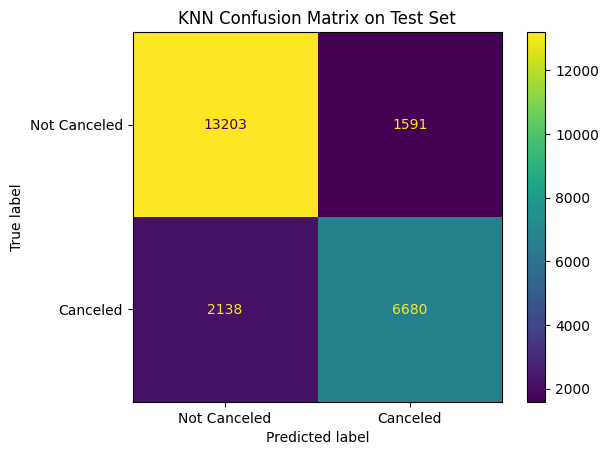

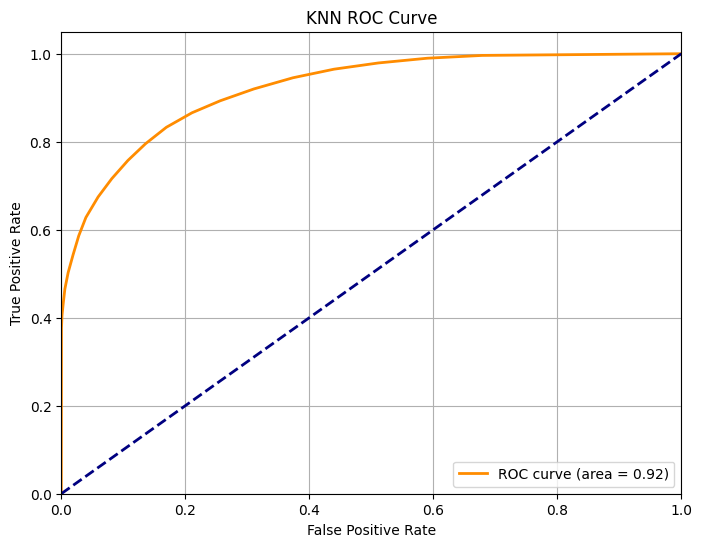

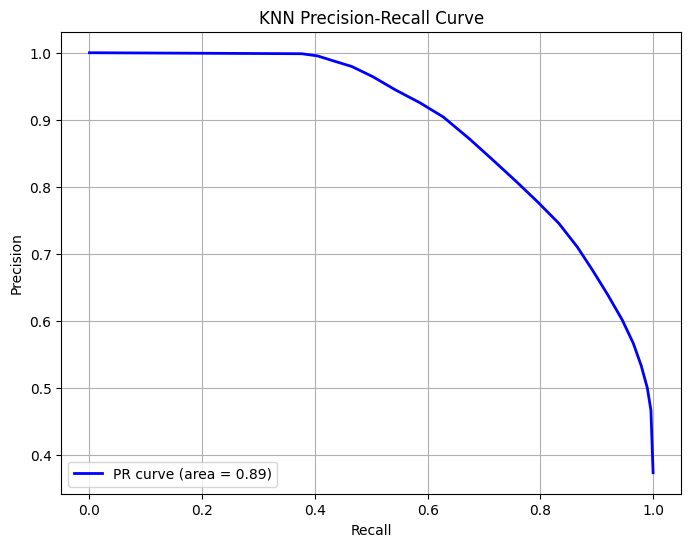

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import time

# Get the best model from the grid search
best_model_knn = grid_search_knn.best_estimator_

# Measure prediction time on the test set
start_predict_time_knn = time.time()
y_pred_knn = best_model_knn.predict(X_test)
end_predict_time_knn = time.time()

predict_runtime_knn = end_predict_time_knn - start_predict_time_knn

# Get predicted probabilities for ROC and PR curves
y_prob_knn = best_model_knn.predict_proba(X_test)[:, 1] # Probability of the positive class (cancellation)


# Calculate performance metrics
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)

print(f"KNN F1 Score on Test Set: {f1_knn:.4f}")
print(f"KNN ROC AUC Score on Test Set: {roc_auc_knn:.4f}")
print(f"\nKNN Prediction Runtime (on test set): {predict_runtime_knn:.4f} seconds")


# Calculate and display the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nKNN Confusion Matrix on Test Set:")
display(cm_knn)

# Visualize the confusion matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Not Canceled', 'Canceled'])
disp_knn.plot()
plt.title('KNN Confusion Matrix on Test Set')
plt.show()

# Generate and plot ROC Curve
fpr_knn, tpr_knn, thresholds_roc_knn = roc_curve(y_test, y_prob_knn)
roc_auc_plot_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_plot_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Generate and plot Precision-Recall Curve
precision_knn, recall_knn, thresholds_pr_knn = precision_recall_curve(y_test, y_prob_knn)
pr_auc_knn = auc(recall_knn, precision_knn)

plt.figure(figsize=(8, 6))
plt.plot(recall_knn, precision_knn, color='blue', lw=2, label=f'PR curve (area = {pr_auc_knn:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('KNN Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

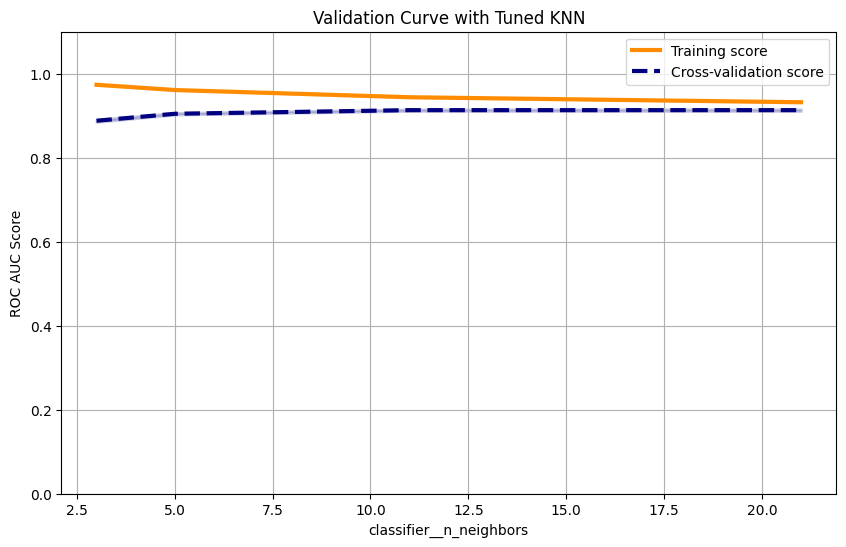

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

# Get the best KNN classifier parameters found during tuning (excluding n_neighbors)
best_knn_params = grid_search_knn.best_params_.copy()
if 'classifier__n_neighbors' in best_knn_params:
    del best_knn_params['classifier__n_neighbors']

# Create a pipeline with the best parameters found during tuning
pipeline_tuned_for_vc_knn = Pipeline(steps=[
    ('preprocessor', best_model_knn.named_steps['preprocessor']),
    ('classifier', KNeighborsClassifier(**{k.replace('classifier__', ''): v for k, v in best_knn_params.items()})) # Use best params, removing 'classifier__' prefix
])


# Define the range of n_neighbors values to explore for the validation curve
param_range_n_neighbors = knn_param_grid['classifier__n_neighbors']

# Generate the validation curve for 'classifier__n_neighbors'
param_name = "classifier__n_neighbors"

train_scores_knn, valid_scores_knn = validation_curve(
    pipeline_tuned_for_vc_knn, # Use the pipeline with best parameters (except n_neighbors)
    X_train, y_train, # Use unprocessed X_train with the full pipeline
    param_name=param_name,
    param_range=param_range_n_neighbors,
    cv=cv_strategy, # Use the same cross-validation strategy as tuning
    scoring="roc_auc", # Use ROC AUC as the scoring metric
    n_jobs=-1 # Use all available CPU cores
)

# Calculate mean and standard deviation for training and validation scores
train_scores_mean_knn = np.mean(train_scores_knn, axis=1)
train_scores_std_knn = np.std(train_scores_knn, axis=1)
valid_scores_mean_knn = np.mean(valid_scores_knn, axis=1)
valid_scores_std_knn = np.std(valid_scores_knn, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve with Tuned KNN")
plt.xlabel(param_name)
plt.ylabel("ROC AUC Score")
plt.ylim(0.0, 1.1)
lw = 2

plt.plot(param_range_n_neighbors, train_scores_mean_knn, label="Training score",
             color="darkorange", lw=lw + 1, linestyle='-') # Solid line for training
plt.fill_between(param_range_n_neighbors, train_scores_mean_knn - train_scores_std_knn,
                 train_scores_mean_knn + train_scores_std_knn, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range_n_neighbors, valid_scores_mean_knn, label="Cross-validation score",
             color="navy", lw=lw + 1, linestyle='--') # Dashed line for validation
plt.fill_between(param_range_n_neighbors, valid_scores_mean_knn - valid_scores_std_knn,
                 valid_scores_mean_knn + valid_scores_std_knn, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.grid(True)
plt.show()

/tmp/ipython-input-1208990191.py:33: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(train_sizes_knn, train_scores_mean_knn, 'o-', color="r",
/tmp/ipython-input-1208990191.py:38: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(train_sizes_knn, valid_scores_mean_knn, 'o-', color="g",


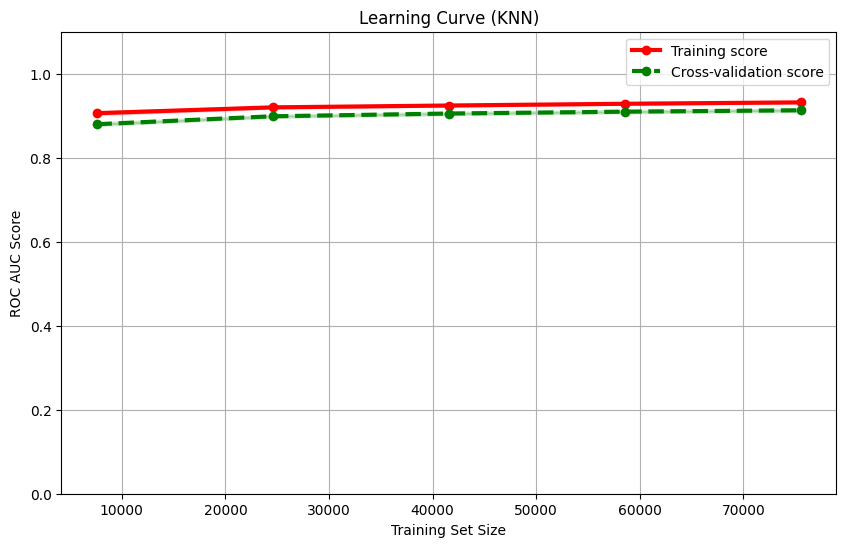

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Get the best model from the grid search (which is the tuned pipeline)
best_pipeline_knn = grid_search_knn.best_estimator_

# Generate learning curves
train_sizes_knn, train_scores_knn, valid_scores_knn = learning_curve(
    best_pipeline_knn,
    X_train, y_train,
    cv=cv_strategy, # Use StratifiedShuffleSplit for cross-validation (consistent with tuning)
    scoring="roc_auc", # Use ROC AUC as the scoring metric
    n_jobs=-1, # Use all available CPU cores
    train_sizes=np.linspace(0.1, 1.0, 5) # Use 5 different training set sizes from 10% to 100%
)

# Calculate mean and standard deviation for training and validation scores
train_scores_mean_knn = np.mean(train_scores_knn, axis=1)
train_scores_std_knn = np.std(train_scores_knn, axis=1)
valid_scores_mean_knn = np.mean(valid_scores_knn, axis=1)
valid_scores_std_knn = np.std(valid_scores_knn, axis=1)

# Create Matplotlib figure and plot
plt.figure(figsize=(10, 6))
plt.title("Learning Curve (KNN)")
plt.xlabel("Training Set Size")
plt.ylabel("ROC AUC Score")
plt.ylim(0.0, 1.1)
lw = 2

plt.grid()
# Use different line styles and thicker lines for better differentiation
plt.plot(train_sizes_knn, train_scores_mean_knn, 'o-', color="r",
         label="Training score", lw=lw + 1, linestyle='-') # Solid line for training
plt.fill_between(train_sizes_knn, train_scores_mean_knn - train_scores_std_knn,
                 train_scores_mean_knn + train_scores_std_knn, alpha=0.2,
                 color="r", lw=lw)
plt.plot(train_sizes_knn, valid_scores_mean_knn, 'o-', color="g",
         label="Cross-validation score", lw=lw + 1, linestyle='--') # Dashed line for validation
plt.fill_between(train_sizes_knn, valid_scores_mean_knn - valid_scores_std_knn,
                 valid_scores_mean_knn + valid_scores_std_knn, alpha=0.2,
                 color="g", lw=lw)
plt.legend(loc="best")
plt.show()

## SVM (Linear & RBF)

## Define linear svm model and hyperparameter grid


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

# Create a Pipeline for the Linear SVM model using SGDClassifier with hinge loss
linear_svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(loss="hinge", # Hinge loss for linear SVM
                                 random_state=random_state,
                                 early_stopping=True, # Stop when validation score is not improving
                                 validation_fraction=0.1, # Fraction of training data to set aside for early stopping
                                 n_iter_no_change=5, # Number of iterations with no improvement to wait before stopping
                                 # max_iter will be tuned within the specified range
                                 n_jobs=-1)) # Use all available CPU cores
])

# Define the hyperparameter grid for the Linear SVM (SGDClassifier)
linear_svm_param_grid = {
    'classifier__alpha': [1e-5, 1e-4, 1e-3],
    'classifier__max_iter': [5000, 10000, 15000, 20000], # Specified range for max_iter
    'classifier__class_weight': ['balanced'] # Recommended for imbalanced data
}

print("Linear SVM pipeline (SGDClassifier) and hyperparameter grid defined.")

Linear SVM pipeline (SGDClassifier) and hyperparameter grid defined.


In [ ]:
from sklearn.model_selection import GridSearchCV # Import GridSearchCV

# Start timer for tuning process
start_time = time.time()

# Initialize GridSearchCV for the Linear SVM pipeline and parameter grid
grid_search_linear_svm = GridSearchCV(
    linear_svm_pipeline,
    linear_svm_param_grid,
    cv=cv_strategy,       # Use StratifiedShuffleSplit for cross-validation
    scoring={'roc_auc': 'roc_auc', 'f1': 'f1'}, # Use both ROC AUC and F1 as scoring metrics
    refit='roc_auc', # Refit the best model based on ROC AUC
    n_jobs=-1   # Use all available CPU cores
)

# Perform the grid search on the training data (includes final fit of best estimator)
grid_search_linear_svm.fit(X_train, y_train)

# End timer for tuning process
end_time = time.time()
tuning_runtime_linear_svm = end_time - start_time

# Get peak memory usage after the grid search fit process finishes
peak_memory_kb_linear_svm = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
peak_memory_gb_linear_svm = peak_memory_kb_linear_svm / (1024**2) # Convert from KB to KB->MB->GB

# Print the best hyperparameters found
print("Best hyperparameters found for Linear SVM:")
display(grid_search_linear_svm.best_params_)

# Print the best cross-validation scores for both metrics
print(f"\nBest cross-validation ROC AUC score for Linear SVM: {grid_search_linear_svm.best_score_:.4f}")
# Access the mean test F1 score from the cv_results_
mean_test_f1_linear_svm = grid_search_linear_svm.cv_results_['mean_test_f1'][grid_search_linear_svm.best_index_]
print(f"Best cross-validation F1 score for Linear SVM: {mean_test_f1_linear_svm:.4f}")

# Report the tuning runtime, and hardware
print(f"\nLinear SVM Hyperparameter Tuning Runtime (including final fit): {tuning_runtime_linear_svm:.2f} seconds")

print("\n--- Hardware Information ---")
print(f"Processor: {platform.processor()}")
print(f"Python Version: {platform.python_version()}")
print(f"System: {platform.system()} {platform.release()}")
print(f"Total RAM: {round(psutil.virtual_memory().total / (1024**3), 2)} GB")
print(f"Estimated Peak RAM Usage (during Linear SVM Tuning/Final Fit): {peak_memory_gb_linear_svm:.4f} GB")

Best hyperparameters found for Linear SVM:


{'classifier__alpha': 0.001,
 'classifier__class_weight': 'balanced',
 'classifier__max_iter': 5000}


Best cross-validation ROC AUC score for Linear SVM: 0.8901
Best cross-validation F1 score for Linear SVM: 0.7523

Linear SVM Hyperparameter Tuning Runtime (including final fit): 7.07 seconds

--- Hardware Information ---
Processor: x86_64
Python Version: 3.12.11
System: Linux 6.1.123+
Total RAM: 50.99 GB
Estimated Peak RAM Usage (during Linear SVM Tuning/Final Fit): 0.5830 GB


### Evaluate the Performance of Linear SVM

Calibrated Linear SVM F1 Score on Test Set: 0.7366
Calibrated Linear SVM ROC AUC Score on Test Set (using probabilities): 0.8951

Calibrated Linear SVM Prediction Runtime (on test set): 0.0314 seconds

Calibrated Linear SVM Confusion Matrix on Test Set:


array([[13236,  1558],
       [ 2769,  6049]])

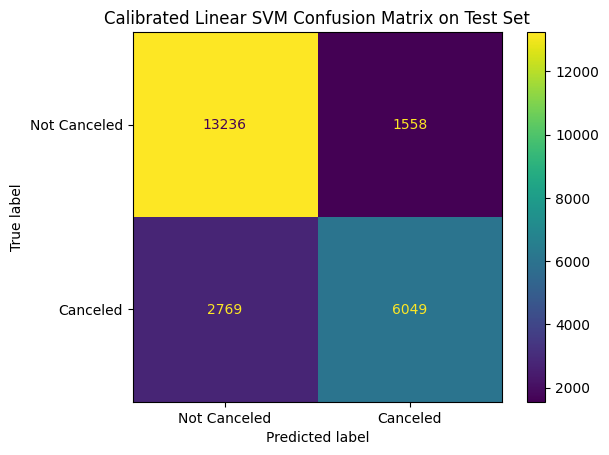

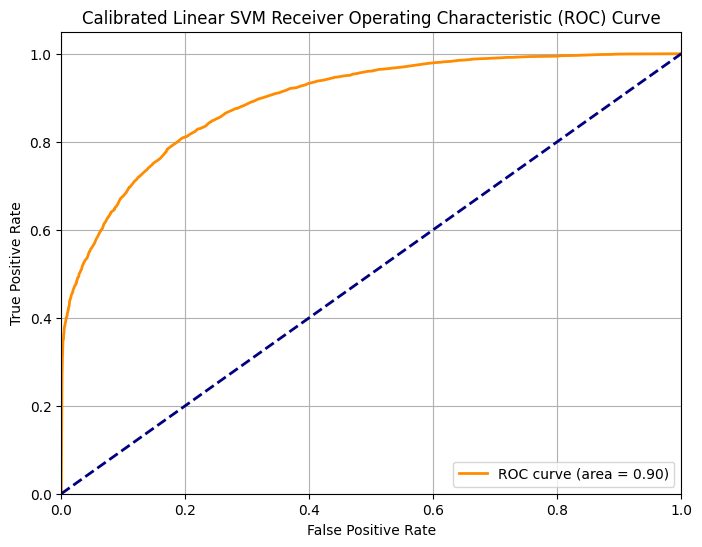

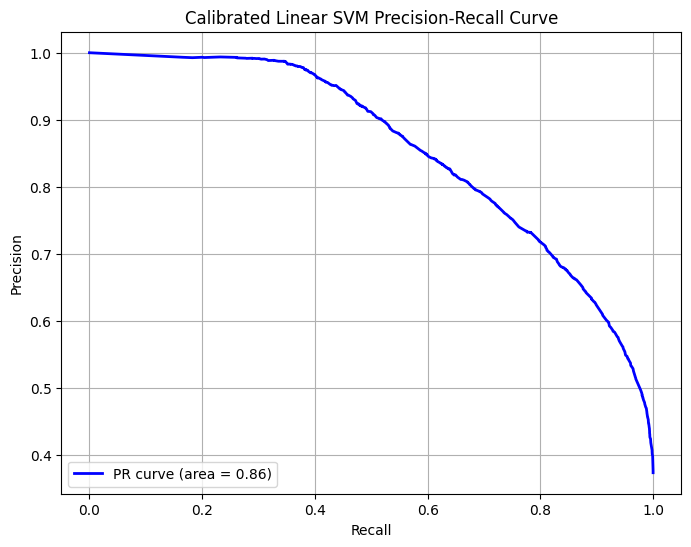

<Figure size 800x600 with 0 Axes>

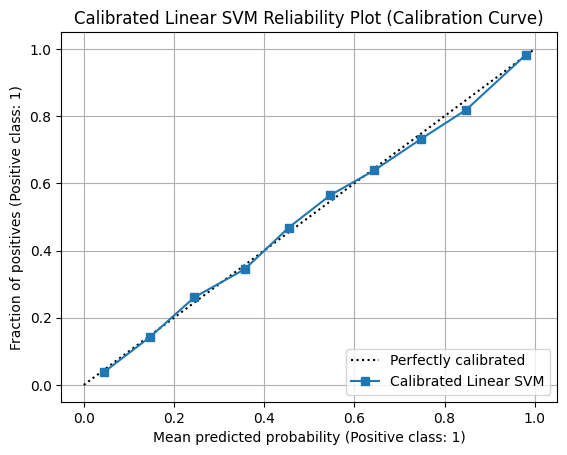

In [ ]:
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, precision_recall_curve, auc


# Get the best Linear SVM model (SGDClassifier) from the grid search
best_linear_svm_model = grid_search_linear_svm.best_estimator_

# Wrap the best Linear SVM model with CalibratedClassifierCV to get calibrated probabilities
calibrated_linear_svm = CalibratedClassifierCV(best_linear_svm_model, method='isotonic', cv=2) # Using cv=2 as a workaround for compatibility


# Fit the calibrator on the training data
calibrated_linear_svm.fit(X_train, y_train)

# Measure prediction time on the test set using the calibrated model
start_predict_time_linear_svm = time.time()
y_pred_linear_svm = calibrated_linear_svm.predict(X_test)
end_predict_time_linear_svm = time.time()

predict_runtime_linear_svm = end_predict_time_linear_svm - start_predict_time_linear_svm

# Get predicted probabilities for evaluation plots
y_prob_linear_svm = calibrated_linear_svm.predict_proba(X_test)[:, 1] # Probability of the positive class (cancellation)


# Calculate performance metrics for the calibrated model
f1_linear_svm = f1_score(y_test, y_pred_linear_svm)
roc_auc_linear_svm = roc_auc_score(y_test, y_prob_linear_svm) # Use y_prob for ROC AUC of probabilities

print(f"Calibrated Linear SVM F1 Score on Test Set: {f1_linear_svm:.4f}")
print(f"Calibrated Linear SVM ROC AUC Score on Test Set (using probabilities): {roc_auc_linear_svm:.4f}")
print(f"\nCalibrated Linear SVM Prediction Runtime (on test set): {predict_runtime_linear_svm:.4f} seconds")

# Calculate and display the confusion matrix for the calibrated model
cm_linear_svm = confusion_matrix(y_test, y_pred_linear_svm)
print("\nCalibrated Linear SVM Confusion Matrix on Test Set:")
display(cm_linear_svm)

# Visualize the confusion matrix
disp_linear_svm = ConfusionMatrixDisplay(confusion_matrix=cm_linear_svm, display_labels=['Not Canceled', 'Canceled'])
disp_linear_svm.plot()
plt.title('Calibrated Linear SVM Confusion Matrix on Test Set')
plt.show()

# Generate and plot ROC Curve for the calibrated model
fpr_linear_svm, tpr_linear_svm, thresholds_roc_linear_svm = roc_curve(y_test, y_prob_linear_svm)
roc_auc_plot_linear_svm = auc(fpr_linear_svm, tpr_linear_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_linear_svm, tpr_linear_svm, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_plot_linear_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Calibrated Linear SVM Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Generate and plot Precision-Recall Curve for the calibrated model
precision_linear_svm, recall_linear_svm, thresholds_pr_linear_svm = precision_recall_curve(y_test, y_prob_linear_svm)
pr_auc_linear_svm = auc(recall_linear_svm, precision_linear_svm)

plt.figure(figsize=(8, 6))
plt.plot(recall_linear_svm, precision_linear_svm, color='blue', lw=2, label=f'PR curve (area = {pr_auc_linear_svm:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Calibrated Linear SVM Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

# Generate and plot Calibration Curve (Reliability Plot)
plt.figure(figsize=(8, 6))
# Removed hist=True as it caused an error
# Note: CalibrationDisplay.from_estimator requires the estimator to have predict_proba
CalibrationDisplay.from_estimator(calibrated_linear_svm, X_test, y_test, n_bins=10, label='Calibrated Linear SVM')
plt.title('Calibrated Linear SVM Reliability Plot (Calibration Curve)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

/tmp/ipython-input-844859286.py:29: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(train_sizes_calibrated_linear_svm, train_scores_mean_calibrated_linear_svm, 'o-', color="r",
/tmp/ipython-input-844859286.py:34: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(train_sizes_calibrated_linear_svm, valid_scores_mean_calibrated_linear_svm, 'o-', color="g",


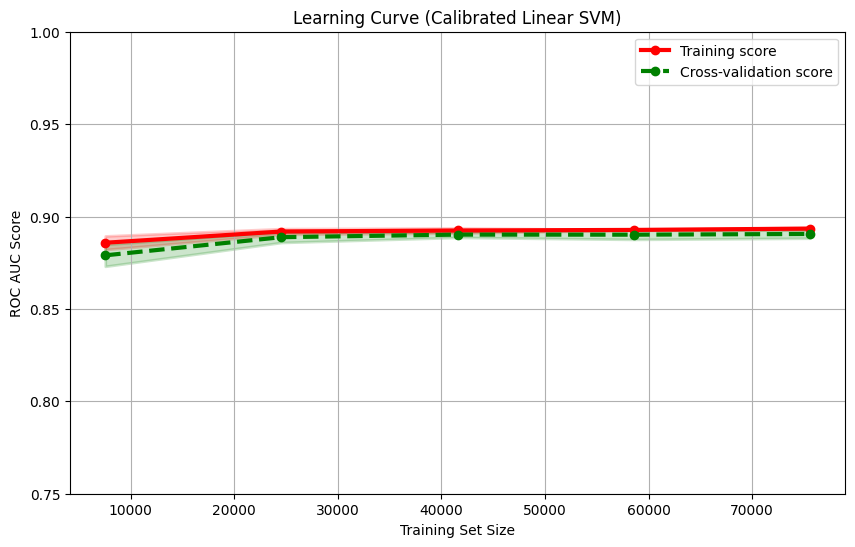

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curves
train_sizes_calibrated_linear_svm, train_scores_calibrated_linear_svm, valid_scores_calibrated_linear_svm = learning_curve(
    calibrated_linear_svm, # Use the calibrated model
    X_train, y_train,
    cv=cv_strategy, # Use StratifiedShuffleSplit for cross-validation
    scoring="roc_auc", # Use ROC AUC as the scoring metric
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate mean and standard deviation for training and validation scores
train_scores_mean_calibrated_linear_svm = np.mean(train_scores_calibrated_linear_svm, axis=1)
train_scores_std_calibrated_linear_svm = np.std(train_scores_calibrated_linear_svm, axis=1)
valid_scores_mean_calibrated_linear_svm = np.mean(valid_scores_calibrated_linear_svm, axis=1)
valid_scores_std_calibrated_linear_svm = np.std(valid_scores_calibrated_linear_svm, axis=1)

# Create Matplotlib figure and plot
plt.figure(figsize=(10, 6))
plt.title("Learning Curve (Calibrated Linear SVM)")
plt.xlabel("Training Set Size")
plt.ylabel("ROC AUC Score")
plt.ylim(0.75, 1.00)
lw = 2

plt.grid()
plt.plot(train_sizes_calibrated_linear_svm, train_scores_mean_calibrated_linear_svm, 'o-', color="r",
         label="Training score", lw=lw + 1, linestyle='-') # Solid line for training
plt.fill_between(train_sizes_calibrated_linear_svm, train_scores_mean_calibrated_linear_svm - train_scores_std_calibrated_linear_svm,
                 train_scores_mean_calibrated_linear_svm + train_scores_std_calibrated_linear_svm, alpha=0.2,
                 color="r", lw=lw)
plt.plot(train_sizes_calibrated_linear_svm, valid_scores_mean_calibrated_linear_svm, 'o-', color="g",
         label="Cross-validation score", lw=lw + 1, linestyle='--') # Dashed line for validation
plt.fill_between(train_sizes_calibrated_linear_svm, valid_scores_mean_calibrated_linear_svm - valid_scores_std_calibrated_linear_svm,
                 valid_scores_mean_calibrated_linear_svm + valid_scores_std_calibrated_linear_svm, alpha=0.2,
                 color="g", lw=lw)
plt.legend(loc="best")
plt.show()

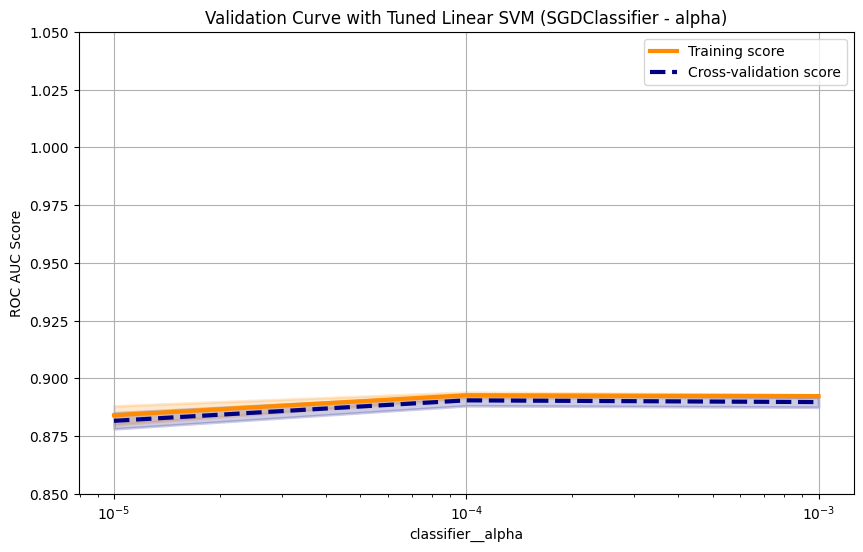

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import SGDClassifier # Ensure SGDClassifier is imported

# Get the best Linear SVM (SGDClassifier) parameters found during tuning
best_linear_svm_params = grid_search_linear_svm.best_params_.copy()
# The parameter being varied in the validation curve (alpha) should not be included here as a fixed parameter
if 'classifier__alpha' in best_linear_svm_params:
    del best_linear_svm_params['classifier__alpha']

# Create a pipeline with the best parameters found during tuning (excluding alpha)
pipeline_tuned_for_vc_linear_svm = Pipeline(steps=[
    ('preprocessor', best_linear_svm_model.named_steps['preprocessor']), # Use the fitted preprocessor
    ('classifier', SGDClassifier(loss="hinge", random_state=random_state, # Use SGDClassifier with hinge loss
                                 **{k.replace('classifier__', ''): v for k, v in best_linear_svm_params.items()})) # Use best parameters, removing 'classifier__' prefix
])

# Define the range of alpha values to explore for the validation curve
param_range_alpha = linear_svm_param_grid['classifier__alpha']

# Generate the validation curve for 'classifier__alpha'
param_name = "classifier__alpha"

train_scores_linear_svm_vc, valid_scores_linear_svm_vc = validation_curve(
    pipeline_tuned_for_vc_linear_svm, # Use the pipeline with best parameters (except alpha)
    X_train, y_train, # Use unprocessed X_train with the full pipeline
    param_name=param_name,
    param_range=param_range_alpha,
    cv=cv_strategy, # Use the same cross-validation strategy as tuning
    scoring="roc_auc", # Use ROC AUC as the scoring metric
    n_jobs=-1 # Use all available CPU cores
)

# Calculate mean and standard deviation for training and validation scores
train_scores_mean_linear_svm_vc = np.mean(train_scores_linear_svm_vc, axis=1)
train_scores_std_linear_svm_vc = np.std(train_scores_linear_svm_vc, axis=1)
valid_scores_mean_linear_svm_vc = np.mean(valid_scores_linear_svm_vc, axis=1)
valid_scores_std_linear_svm_vc = np.std(valid_scores_linear_svm_vc, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve with Tuned Linear SVM (SGDClassifier - alpha)")
plt.xlabel(param_name)
plt.ylabel("ROC AUC Score")
# Adjust the Y-axis limits to make the difference between lines more obvious
plt.ylim(0.85, 1.05) # Adjust range as needed based on actual score values
lw = 2

plt.grid()
plt.plot(param_range_alpha, train_scores_mean_linear_svm_vc, label="Training score",
             color="darkorange", lw=lw + 1, linestyle='-') # Solid line for training
plt.fill_between(param_range_alpha, train_scores_mean_linear_svm_vc - train_scores_std_linear_svm_vc,
                 train_scores_mean_linear_svm_vc + train_scores_std_linear_svm_vc, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range_alpha, valid_scores_mean_linear_svm_vc, label="Cross-validation score",
             color="navy", lw=lw + 1, linestyle='--') # Dashed line for validation
plt.fill_between(param_range_alpha, valid_scores_mean_linear_svm_vc - valid_scores_std_linear_svm_vc,
                 valid_scores_mean_linear_svm_vc + valid_scores_std_linear_svm_vc, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.xscale('log') # Use log scale for alpha as values can vary widely
plt.grid(True)
plt.show()

## Kernel SVM
### Define RBF Kernel SVM Model and Hyperparameter Grid

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import numpy as np # Import numpy for logspace

# Create a Pipeline for the Kernel SVM model
kernel_svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, # Enable probability estimates
                       random_state=random_state,
                       class_weight="balanced")) # Handle class imbalance
])

# Define the hyperparameter grid for the Kernel SVM (SVC)
kernel_svm_param_grid = {
    'classifier__C': np.logspace(-2, 2, 5), # Coarse log grid for C
    'classifier__gamma': np.logspace(-3, 1, 5), # Coarse log grid for gamma
    'classifier__kernel': ['rbf', 'linear'] # Include both RBF and linear kernels
}

print("Kernel SVM model (SVC with RBF and linear kernels) and hyperparameter grid defined.")

Kernel SVM model (SVC with RBF and linear kernels) and hyperparameter grid defined.


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit # Import GridSearchCV and StratifiedShuffleSplit
import time
import platform
import psutil
import resource # Import resource for peak memory

# Start timer for tuning process
start_time = time.time()

# Define the subset size
subset_size = 5000

# Create a stratified sample of the training data
splitter = StratifiedShuffleSplit(n_splits=1, train_size=subset_size, random_state=random_state)
train_subset_idx, _ = next(splitter.split(X_train, y_train))
X_train_subset = X_train.iloc[train_subset_idx]
y_train_subset = y_train.iloc[train_subset_idx]

print(f"Using a training subset of size: {X_train_subset.shape[0]}")

# Initialize GridSearchCV for the Kernel SVM pipeline and parameter grid
grid_search_kernel_svm = GridSearchCV(
    kernel_svm_pipeline,
    kernel_svm_param_grid,
    cv=cv_strategy,       # Use StratifiedShuffleSplit for cross-validation
    scoring={'roc_auc': 'roc_auc', 'f1': 'f1'}, # Use both ROC AUC and F1 as scoring metrics
    refit='roc_auc', # Refit the best model based on ROC AUC
    n_jobs=-1   # Use all available CPU cores
)

# Perform the grid search on the training SUBSET (includes final fit of best estimator)
grid_search_kernel_svm.fit(X_train_subset, y_train_subset)

# End timer for tuning process
end_time = time.time()
tuning_runtime_kernel_svm = end_time - start_time

# Get peak memory usage after the grid search fit process finishes
peak_memory_kb_kernel_svm = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
peak_memory_gb_kernel_svm = peak_memory_kb_kernel_svm / (1024**2) # Convert from KB to KB->MB->GB

# Print the best hyperparameters found
print("Best hyperparameters found for Kernel SVM (trained on subset):")
display(grid_search_kernel_svm.best_params_)

# Print the best cross-validation scores for both metrics
print(f"\nBest cross-validation ROC AUC score for Kernel SVM (trained on subset): {grid_search_kernel_svm.best_score_:.4f}")
# Access the mean test F1 score from the cv_results_
mean_test_f1_kernel_svm = grid_search_kernel_svm.cv_results_['mean_test_f1'][grid_search_kernel_svm.best_index_]
print(f"Best cross-validation F1 score for Kernel SVM (trained on subset): {mean_test_f1_kernel_svm:.4f}")

# Report the tuning runtime, and hardware
print(f"\nKernel SVM Hyperparameter Tuning Runtime (including final fit on subset): {tuning_runtime_kernel_svm:.2f} seconds")

print("\n--- Hardware Information ---")
print(f"Processor: {platform.processor()}")
print(f"Python Version: {platform.python_version()}")
print(f"System: {platform.system()} {platform.release()}")
print(f"Total RAM: {round(psutil.virtual_memory().total / (1024**3), 2)} GB")
print(f"Estimated Peak RAM Usage (during Kernel SVM Tuning/Final Fit on subset): {peak_memory_gb_kernel_svm:.4f} GB")

Using a training subset of size: 5000
Best hyperparameters found for Kernel SVM (trained on subset):


{'classifier__C': np.float64(10.0),
 'classifier__gamma': np.float64(0.01),
 'classifier__kernel': 'rbf'}


Best cross-validation ROC AUC score for Kernel SVM (trained on subset): 0.9133
Best cross-validation F1 score for Kernel SVM (trained on subset): 0.7885

Kernel SVM Hyperparameter Tuning Runtime (including final fit on subset): 695.47 seconds

--- Hardware Information ---
Processor: x86_64
Python Version: 3.12.11
System: Linux 6.1.123+
Total RAM: 50.99 GB
Estimated Peak RAM Usage (during Kernel SVM Tuning/Final Fit on subset): 0.5830 GB


Kernel SVM Accuracy on Test Set (trained on subset): 0.8225
Kernel SVM Precision on Test Set (trained on subset): 0.7332
Kernel SVM F1 Score on Test Set (trained on subset): 0.7763
Kernel SVM ROC AUC Score on Test Set (trained on subset, using probabilities): 0.9114

Kernel SVM Prediction Runtime (on test set): 2.9697 seconds

Kernel SVM Confusion Matrix on Test Set (trained on subset):


array([[12148,  2646],
       [ 1546,  7272]])

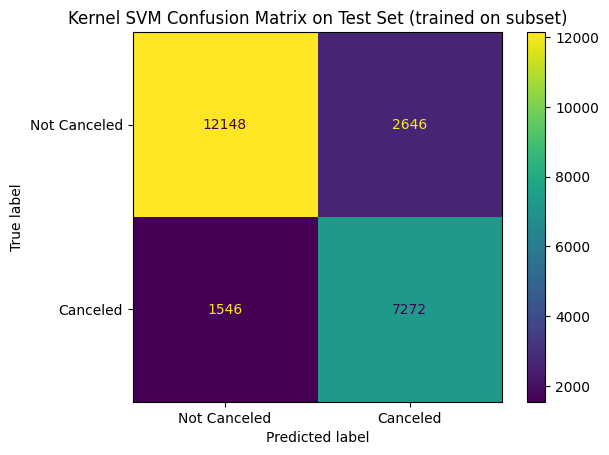

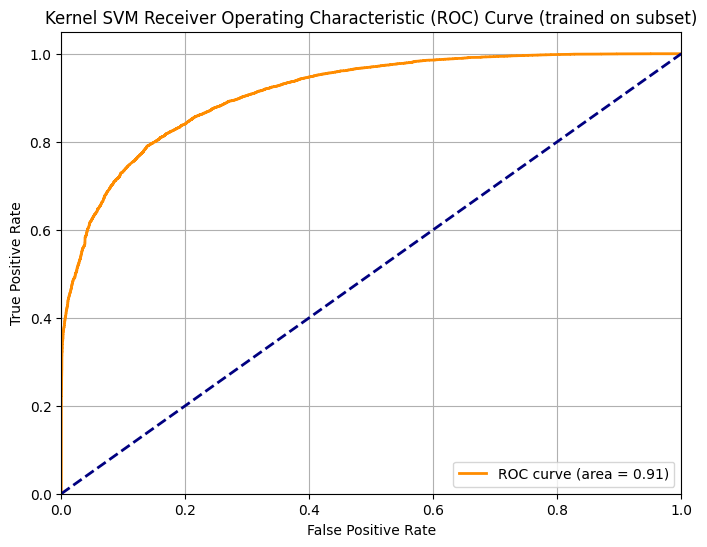

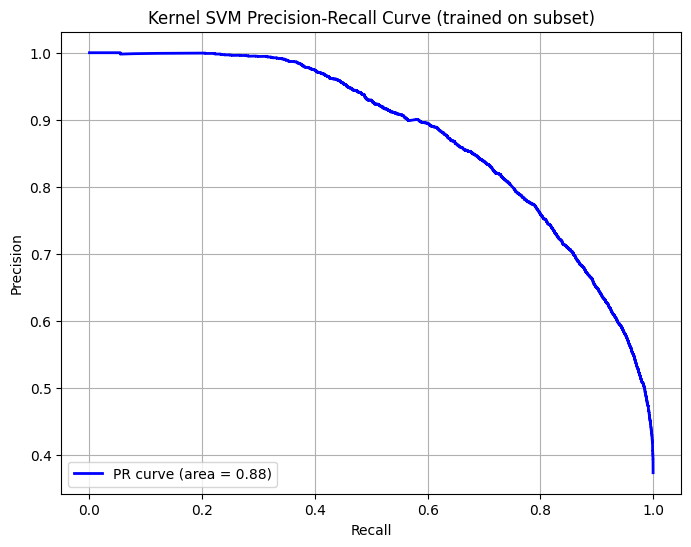

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, precision_recall_curve, auc, accuracy_score, precision_score
import matplotlib.pyplot as plt
import time

# Get the best model from the grid search (this model was trained on the subset)
best_model_kernel_svm = grid_search_kernel_svm.best_estimator_

# Measure prediction time on the test set
start_predict_time_kernel_svm = time.time()
y_pred_kernel_svm = best_model_kernel_svm.predict(X_test)
end_predict_time_kernel_svm = time.time()

predict_runtime_kernel_svm = end_predict_time_kernel_svm - start_predict_time_kernel_svm

# Get predicted probabilities for ROC and PR curves
y_prob_kernel_svm = best_model_kernel_svm.predict_proba(X_test)[:, 1] # Probability of the positive class (cancellation)


# Calculate performance metrics
f1_kernel_svm = f1_score(y_test, y_pred_kernel_svm)
roc_auc_kernel_svm = roc_auc_score(y_test, y_prob_kernel_svm) # Use y_prob for ROC AUC of probabilities
accuracy_kernel_svm = accuracy_score(y_test, y_pred_kernel_svm)
precision_kernel_svm = precision_score(y_test, y_pred_kernel_svm)


print(f"Kernel SVM Accuracy on Test Set (trained on subset): {accuracy_kernel_svm:.4f}")
print(f"Kernel SVM Precision on Test Set (trained on subset): {precision_kernel_svm:.4f}")
print(f"Kernel SVM F1 Score on Test Set (trained on subset): {f1_kernel_svm:.4f}")
print(f"Kernel SVM ROC AUC Score on Test Set (trained on subset, using probabilities): {roc_auc_kernel_svm:.4f}")
print(f"\nKernel SVM Prediction Runtime (on test set): {predict_runtime_kernel_svm:.4f} seconds")


# Calculate and display the confusion matrix
cm_kernel_svm = confusion_matrix(y_test, y_pred_kernel_svm)
print("\nKernel SVM Confusion Matrix on Test Set (trained on subset):")
display(cm_kernel_svm)

# Visualize the confusion matrix
disp_kernel_svm = ConfusionMatrixDisplay(confusion_matrix=cm_kernel_svm, display_labels=['Not Canceled', 'Canceled'])
disp_kernel_svm.plot()
plt.title('Kernel SVM Confusion Matrix on Test Set (trained on subset)')
plt.show()

# Generate and plot ROC Curve
fpr_kernel_svm, tpr_kernel_svm, thresholds_roc_kernel_svm = roc_curve(y_test, y_prob_kernel_svm)
roc_auc_plot_kernel_svm = auc(fpr_kernel_svm, tpr_kernel_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_kernel_svm, tpr_kernel_svm, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_plot_kernel_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kernel SVM Receiver Operating Characteristic (ROC) Curve (trained on subset)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Generate and plot Precision-Recall Curve
precision_kernel_svm, recall_kernel_svm, thresholds_pr_kernel_svm = precision_recall_curve(y_test, y_prob_kernel_svm)
pr_auc_kernel_svm = auc(recall_kernel_svm, precision_kernel_svm)

plt.figure(figsize=(8, 6))
plt.plot(recall_kernel_svm, precision_kernel_svm, color='blue', lw=2, label=f'PR curve (area = {pr_auc_kernel_svm:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Kernel SVM Precision-Recall Curve (trained on subset)')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

Subsampling training data for Kernel SVM validation curves to 10000 samples.


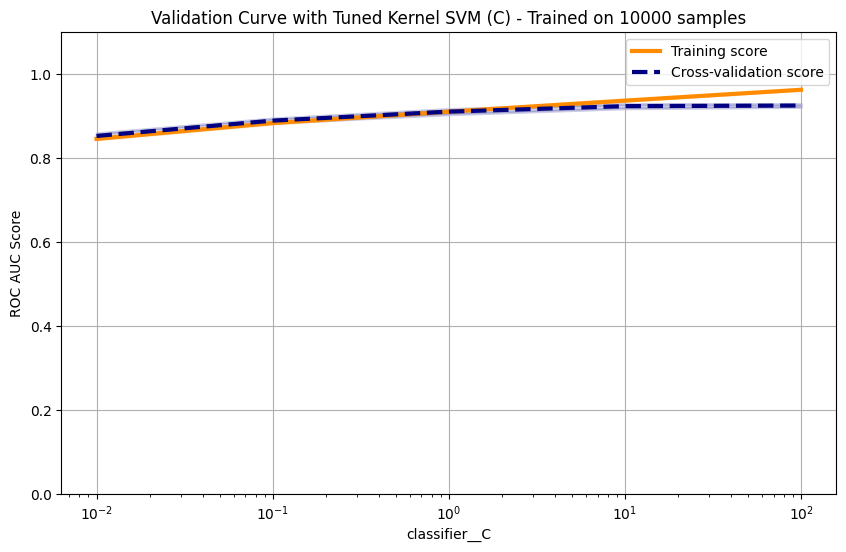

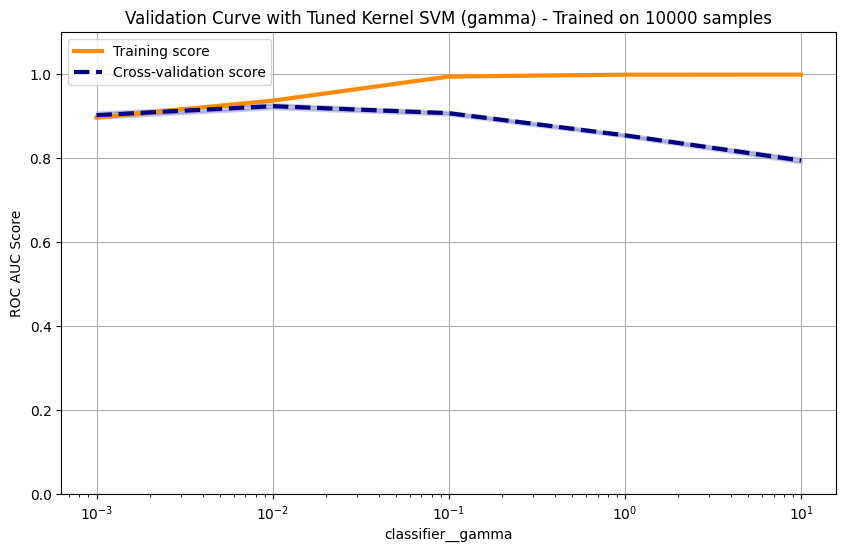

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np # Import numpy

# Get the best Kernel SVM classifier parameters found during tuning
best_kernel_svm_params = grid_search_kernel_svm.best_params_.copy()
best_kernel = best_kernel_svm_params['classifier__kernel']

# Create a pipeline with the best parameters found during tuning,
# excluding the parameter that will be varied in the validation curve
pipeline_tuned_for_vc_kernel_svm = Pipeline(steps=[
    ('preprocessor', grid_search_kernel_svm.best_estimator_.named_steps['preprocessor']), # Use the fitted preprocessor from the tuned model
    ('classifier', SVC(probability=True, # Keep probability=True if calibrating later
                       random_state=random_state,
                       class_weight="balanced",
                       kernel=best_kernel)) # Use the best kernel found
])

# Define the subset size for validation curves
vc_subset_size = 10000

print(f"Subsampling training data for Kernel SVM validation curves to {vc_subset_size} samples.")
if X_train.shape[0] > vc_subset_size:
    splitter_vc = StratifiedShuffleSplit(n_splits=1, train_size=vc_subset_size, random_state=random_state)
    vc_train_idx, _ = next(splitter_vc.split(X_train, y_train))
    X_train_vc_subset = X_train.iloc[vc_train_idx]
    y_train_vc_subset = y_train.iloc[vc_train_idx]
else:
    X_train_vc_subset = X_train
    y_train_vc_subset = y_train
    print(f"Using full training data ({X_train_vc_subset.shape[0]} samples) for Kernel SVM validation curves.")


# --- Generate Validation Curve for 'C' ---
if best_kernel in ['rbf', 'linear']: # C is relevant for both RBF and Linear SVM
    # Get the best gamma to fix while varying C (only relevant for RBF)
    fixed_gamma = best_kernel_svm_params.get('classifier__gamma', 'scale') # Use .get for safety if best kernel was linear

    # Set the fixed gamma parameter on the pipeline before generating the C curve
    pipeline_tuned_for_vc_kernel_svm.set_params(classifier__gamma=fixed_gamma)
    # Ensure C is not fixed here as it will be varied
    pipeline_tuned_for_vc_kernel_svm.set_params(classifier__C=1.0) # Set C to a default value to be overridden by param_range

    # Define the range of C values to explore for the validation curve
    param_range_C = kernel_svm_param_grid['classifier__C'] # Use the same range as in grid search

    # Generate the validation curve for 'classifier__C' on the smaller subset
    param_name_C = "classifier__C"

    train_scores_vc_C, valid_scores_vc_C = validation_curve(
        pipeline_tuned_for_vc_kernel_svm, # Use the pipeline with fixed gamma (if RBF)
        X_train_vc_subset, y_train_vc_subset, # Use the smaller training subset for validation curve
        param_name=param_name_C,
        param_range=param_range_C,
        cv=cv_strategy, # Use the same cross-validation strategy as tuning
        scoring="roc_auc", # Use ROC AUC as the scoring metric
        n_jobs=-1, # Use all available CPU cores
    )

    # Calculate mean and standard deviation for training and validation scores for C curve
    train_scores_mean_vc_C = np.mean(train_scores_vc_C, axis=1)
    train_scores_std_vc_C = np.std(train_scores_vc_C, axis=1)
    valid_scores_mean_vc_C = np.mean(valid_scores_vc_C, axis=1)
    valid_scores_std_vc_C = np.std(valid_scores_vc_C, axis=1)

    # Plot the validation curve for C
    plt.figure(figsize=(10, 6))
    plt.title(f"Validation Curve with Tuned Kernel SVM (C) - Trained on {X_train_vc_subset.shape[0]} samples")
    plt.xlabel(param_name_C)
    plt.ylabel("ROC AUC Score")
    plt.ylim(0.0, 1.1) # Adjust range as needed
    lw = 2

    plt.grid()
    plt.plot(param_range_C, train_scores_mean_vc_C, label="Training score",
                 color="darkorange", lw=lw + 1, linestyle='-') # Solid line
    plt.fill_between(param_range_C, train_scores_mean_vc_C - train_scores_std_vc_C,
                     train_scores_mean_vc_C + train_scores_std_vc_C, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range_C, valid_scores_mean_vc_C, label="Cross-validation score",
                 color="navy", lw=lw + 1, linestyle='--') # Dashed line
    plt.fill_between(param_range_C, valid_scores_mean_vc_C - valid_scores_std_vc_C,
                     valid_scores_mean_vc_C + valid_scores_std_vc_C, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.xscale('log') # Use log scale for C
    plt.show()

# --- Generate Validation Curve for 'gamma' (only for RBF kernel) ---
if best_kernel == 'rbf':
    # Get the best C to fix while varying gamma
    fixed_C = best_kernel_svm_params['classifier__C']

    # Set the fixed C parameter on the pipeline before generating the gamma curve
    pipeline_tuned_for_vc_kernel_svm.set_params(classifier__C=fixed_C)
    # Ensure gamma is not fixed here as it will be varied
    pipeline_tuned_for_vc_kernel_svm.set_params(classifier__gamma='scale') # Reset gamma to 'scale' or a default if needed

    # Define the range of gamma values to explore for the validation curve
    param_range_gamma = kernel_svm_param_grid['classifier__gamma'] # Use the same range as in grid search

    # Generate the validation curve for 'classifier__gamma' on the smaller subset
    param_name_gamma = "classifier__gamma"

    train_scores_vc_gamma, valid_scores_vc_gamma = validation_curve(
        pipeline_tuned_for_vc_kernel_svm, # Use the pipeline with fixed C
        X_train_vc_subset, y_train_vc_subset, # Use the smaller training subset
        param_name=param_name_gamma,
        param_range=param_range_gamma,
        cv=cv_strategy,
        scoring="roc_auc",
        n_jobs=-1
    )

    # Calculate mean and standard deviation for training and validation scores for gamma curve
    train_scores_mean_vc_gamma = np.mean(train_scores_vc_gamma, axis=1)
    train_scores_std_vc_gamma = np.std(train_scores_vc_gamma, axis=1)
    valid_scores_mean_vc_gamma = np.mean(valid_scores_vc_gamma, axis=1)
    valid_scores_std_vc_gamma = np.std(valid_scores_vc_gamma, axis=1)

    # Plot the validation curve for gamma
    plt.figure(figsize=(10, 6))
    plt.title(f"Validation Curve with Tuned Kernel SVM (gamma) - Trained on {X_train_vc_subset.shape[0]} samples")
    plt.xlabel(param_name_gamma)
    plt.ylabel("ROC AUC Score")
    plt.ylim(0.0, 1.1) # Adjust range as needed
    lw = 2

    plt.grid()
    plt.plot(param_range_gamma, train_scores_mean_vc_gamma, label="Training score",
                 color="darkorange", lw=lw + 1, linestyle='-') # Solid line
    plt.fill_between(param_range_gamma, train_scores_mean_vc_gamma - train_scores_std_vc_gamma,
                     train_scores_mean_vc_gamma + train_scores_std_vc_gamma, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range_gamma, valid_scores_mean_vc_gamma, label="Cross-validation score",
                 color="navy", lw=lw + 1, linestyle='--') # Dashed line
    plt.fill_between(param_range_gamma, valid_scores_mean_vc_gamma - valid_scores_std_vc_gamma,
                     valid_scores_mean_vc_gamma + valid_scores_std_vc_gamma, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.xscale('log') # Use log scale for gamma
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Get the best model from the grid search (this model was trained on the 50k subset)
best_pipeline_rbf_svm = grid_search_rbf_svm.best_estimator_

# Define the maximum training set size for the learning curve plot
max_lc_train_size = 25000 # Set maximum training size for the learning curve back to 25k samples


# Generate learning curves
# Use the best pipeline, the FULL training data (X_train, y_train),
# but limit the training sizes explored up to max_lc_train_size
train_sizes_rbf_svm, train_scores_rbf_svm, valid_scores_rbf_svm = learning_curve(
    best_pipeline_rbf_svm,
    X_train, y_train, # Use the full original training data as the source for sampling
    cv=cv_strategy, # Use StratifiedShuffleSplit for cross-validation
    scoring="roc_auc", # Use ROC AUC as the scoring metric
    n_jobs=-1, # Use all available CPU cores
    # Generate training sizes up to the specified maximum
    train_sizes=np.linspace(1000, max_lc_train_size, 5, dtype=int),

)

# Calculate mean and standard deviation for training and validation scores
train_scores_mean_rbf_svm = np.mean(train_scores_rbf_svm, axis=1)
train_scores_std_rbf_svm = np.std(train_scores_rbf_svm, axis=1)
valid_scores_mean_rbf_svm = np.mean(valid_scores_rbf_svm, axis=1)
valid_scores_std_rbf_svm = np.std(valid_scores_rbf_svm, axis=1)

# Create Matplotlib figure and plot
plt.figure(figsize=(10, 6))
plt.title(f"Learning Curve (RBF Kernel SVM - Trained on 50k Subset, LC up to {max_lc_train_size} samples)")
plt.xlabel("Training Set Size (samples)")
plt.ylabel("ROC AUC Score")
plt.ylim(0.0, 1.1) # Adjust range as needed based on scores
lw = 2

plt.grid()
plt.plot(train_sizes_rbf_svm, train_scores_mean_rbf_svm, 'o-', color="r",
         label="Training score", lw=lw + 1, linestyle='-') # Solid line for training
plt.fill_between(train_sizes_rbf_svm, train_scores_mean_rbf_svm - train_scores_std_rbf_svm,
                 train_scores_mean_rbf_svm + train_scores_std_rbf_svm, alpha=0.2,
                 color="r", lw=lw)
plt.plot(train_sizes_rbf_svm, valid_scores_mean_rbf_svm, 'o-', color="g",
         label="Cross-validation score", lw=lw + 1, linestyle='--') # Dashed line for validation
plt.fill_between(train_sizes_rbf_svm, valid_scores_mean_rbf_svm - valid_scores_std_rbf_svm,
                 valid_scores_mean_rbf_svm + valid_scores_std_rbf_svm, alpha=0.2,
                 color="g", lw=lw)
plt.legend(loc="best")
plt.show()

/tmp/ipython-input-1537391064.py:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(train_sizes_kernel_svm, train_scores_mean_kernel_svm, 'o-', color="r",
/tmp/ipython-input-1537391064.py:46: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(train_sizes_kernel_svm, valid_scores_mean_kernel_svm, 'o-', color="g",


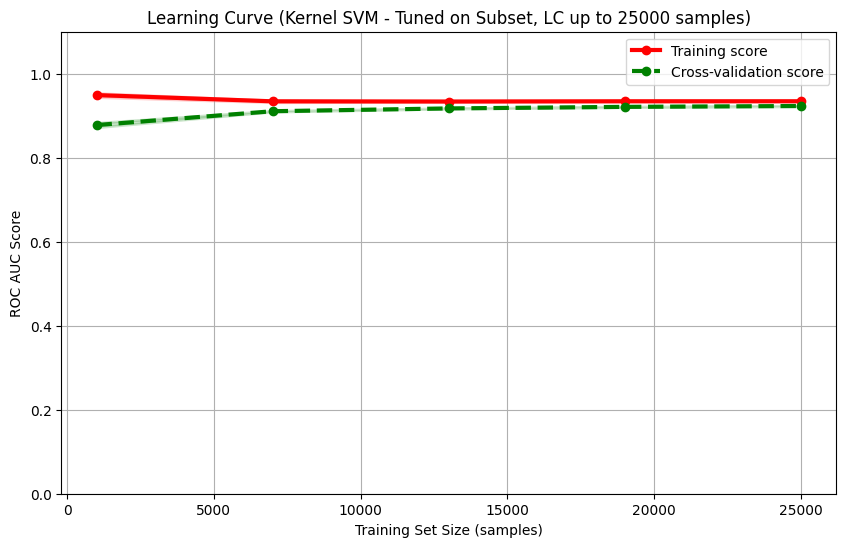

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Get the best model from the grid search (this model was trained on the subset)
best_pipeline_kernel_svm = grid_search_kernel_svm.best_estimator_

# Define the maximum training set size for the learning curve plot
max_lc_train_size = 25000 # Set maximum training size for the learning curve


# Generate learning curves
# Use the best pipeline, the FULL training data (X_train, y_train),
# but limit the training sizes explored up to max_lc_train_size
train_sizes_kernel_svm, train_scores_kernel_svm, valid_scores_kernel_svm = learning_curve(
    best_pipeline_kernel_svm,
    X_train, y_train, # Use the full original training data as the source for sampling
    cv=cv_strategy, # Use StratifiedShuffleSplit for cross-validation
    scoring="roc_auc", # Use ROC AUC as the scoring metric
    n_jobs=-1, # Use all available CPU cores
    # Generate training sizes up to the specified maximum
    train_sizes=np.linspace(1000, max_lc_train_size, 5, dtype=int),

)

# Calculate mean and standard deviation for training and validation scores
train_scores_mean_kernel_svm = np.mean(train_scores_kernel_svm, axis=1)
train_scores_std_kernel_svm = np.std(train_scores_kernel_svm, axis=1)
valid_scores_mean_kernel_svm = np.mean(valid_scores_kernel_svm, axis=1)
valid_scores_std_kernel_svm = np.std(valid_scores_kernel_svm, axis=1)

# Create Matplotlib figure and plot
plt.figure(figsize=(10, 6))
plt.title(f"Learning Curve (Kernel SVM - Tuned on Subset, LC up to {max_lc_train_size} samples)")
plt.xlabel("Training Set Size (samples)")
plt.ylabel("ROC AUC Score")
plt.ylim(0.0, 1.1) # Adjust range as needed based on scores
lw = 2

plt.grid()
plt.plot(train_sizes_kernel_svm, train_scores_mean_kernel_svm, 'o-', color="r",
         label="Training score", lw=lw + 1, linestyle='-') # Solid line for training
plt.fill_between(train_sizes_kernel_svm, train_scores_mean_kernel_svm - train_scores_std_kernel_svm,
                 train_scores_mean_kernel_svm + train_scores_std_kernel_svm, alpha=0.2,
                 color="r", lw=lw)
plt.plot(train_sizes_kernel_svm, valid_scores_mean_kernel_svm, 'o-', color="g",
         label="Cross-validation score", lw=lw + 1, linestyle='--') # Dashed line for validation
plt.fill_between(train_sizes_kernel_svm, valid_scores_mean_kernel_svm - valid_scores_std_kernel_svm,
                 valid_scores_mean_kernel_svm + valid_scores_std_kernel_svm, alpha=0.2,
                 color="g", lw=lw)
plt.legend(loc="best")
plt.show()